SVM

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('cleaned_data_final.csv')
#turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)


In [9]:
# Define the SVM model
def create_model(C=1, kernel='rbf', gamma='scale'):
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    return model


In [29]:
# Define the hyperparameters to search over
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Perform random search to find the best hyperparameters
model = create_model()
search = RandomizedSearchCV(model, params, n_iter=100, cv=2, verbose=3)
search_result = search.fit(X_train, y_train.values.ravel())

C:\Users\kenny\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.556 total time= 6.7min
[CV 2/2] END .C=0.1, gamma=scale, kernel=linear;, score=0.555 total time= 6.5min
[CV 1/2] END ...C=0.1, gamma=scale, kernel=poly;, score=0.505 total time= 7.0min
[CV 2/2] END ...C=0.1, gamma=scale, kernel=poly;, score=0.507 total time= 7.2min
[CV 1/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.555 total time= 9.3min
[CV 2/2] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.555 total time= 9.4min
[CV 1/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.556 total time= 6.7min
[CV 2/2] END ..C=0.1, gamma=auto, kernel=linear;, score=0.555 total time= 6.7min
[CV 1/2] END ....C=0.1, gamma=auto, kernel=poly;, score=0.501 total time= 6.9min
[CV 2/2] END ....C=0.1, gamma=auto, kernel=poly;, score=0.501 total time= 6.9min
[CV 1/2] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.524 total time= 9.5min
[CV 2/2] END .....C=0.1, gamma=auto, kernel=rbf;

In [4]:
# Get the best hyperparameters- hard coded this 
best_params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
print("Best hyperparameters:", best_params)


Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [11]:
# Train the model using the best hyperparameters
model = create_model(**best_params)
history = model.fit(X_train, y_train.values.ravel())



In [12]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [13]:
# Calculate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)


Training accuracy: 0.5655930121468541
Testing accuracy: 0.553335516977836


In [17]:
print(X_train.size)
print(y_train.size)

18024420
73270


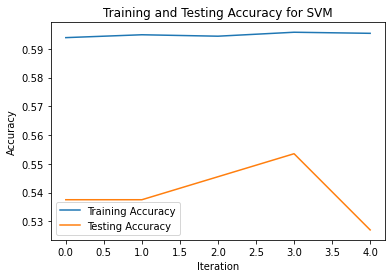

In [19]:
from sklearn.model_selection import KFold
# Define the subset size
subset_size = 10000

# Select a random subset of the data
subset_indices = np.random.choice(X_train.index, subset_size, replace=False)
X_train_subset = X_train.loc[subset_indices]
y_train_subset = y_train.loc[subset_indices]

# Perform cross-validation on the subset
train_acc = []
test_acc = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train_subset):
    X_train_fold, X_test_fold = X_train_subset.iloc[train_index], X_train_subset.iloc[test_index]
    y_train_fold, y_test_fold = y_train_subset.iloc[train_index], y_train_subset.iloc[test_index]
    model.fit(X_train_fold, y_train_fold.values.ravel())
    train_acc.append(accuracy_score(y_train_fold, model.predict(X_train_fold)))
    test_acc.append(accuracy_score(y_test_fold, model.predict(X_test_fold)))

# Plot the training and testing accuracy for each iteration
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy for SVM')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve
import seaborn as sns

# define a show metric function
def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te, digits = 5))
    print()

    # Calculate the confusion matrix for the test set
    cm = confusion_matrix(y_te, yhat_te)
    # Display the confusion matrix using a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix ({})'.format(named))
    plt.show()
    with sns.axes_style('white'):
        # confusion matrix
        #ConfusionMatrixDisplay.from_predictions(y_te, yhat_te)
        #plt.show()
        
        # roc-auc
        fpr, tpr, thresholds = roc_curve(y_te, yhat_te) 
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=named)
        roc_display.plot()
        plt.title('ROC Curve')
        plt.show()
        
        # precision-recall auc
        precision, recall, thresholds = precision_recall_curve(y_te, yhat_te)
        pr_auc = auc(recall, precision)
        pr_display = PrecisionRecallDisplay(precision=precision, recall=recall,
                                             average_precision=pr_auc,
                                             estimator_name=named)
        pr_display.plot()
        plt.title('Precision-Recall Curve')
        plt.show()
        
        # balanced accuracy
        tn, fp, fn, tp = confusion_matrix(y_te, yhat_te).ravel()
        balanced_accuracy = (tp/(tp+fn) + tn/(tn+fp))/2
        print(f'Balanced accuracy: {balanced_accuracy:.3f}')
        
        # specificity and negative predictive value
        specificity = tn / (tn + fp)
        npv = tn / (tn + fn)
        print(f'Specificity: {specificity:.3f}')
        print(f'Negative predictive value: {npv:.3f}')
        
        # false positive and false negative rates
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        print(f'False positive rate: {fpr:.3f}')
        print(f'False negative rate: {fnr:.3f}')

training set accuracy (n=73270): 0.550
test set accuracy (n=18318): 0.539

classificiation report on test set performance
              precision    recall  f1-score   support

           0    0.53398   0.54017   0.53706      9062
           1    0.54464   0.53846   0.54153      9256

    accuracy                        0.53931     18318
   macro avg    0.53931   0.53931   0.53929     18318
weighted avg    0.53937   0.53931   0.53932     18318




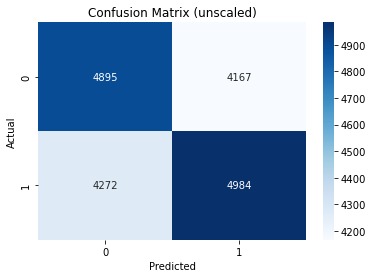

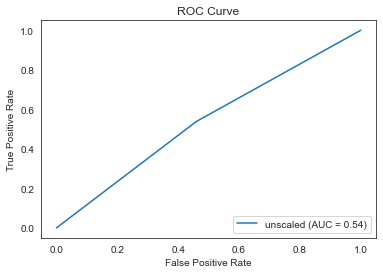

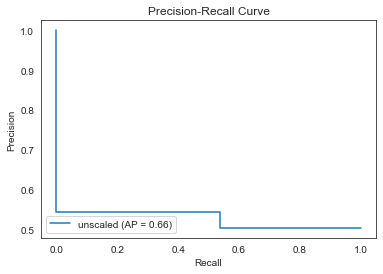

Balanced accuracy: 0.539
Specificity: 0.540
Negative predictive value: 0.534
False positive rate: 0.460
False negative rate: 0.462


In [29]:
# get both predicted train and test labels
yhat_te_prob = model.predict(X_test)
yhat_te = (yhat_te_prob > 0.5).astype(int)
yhat_te

yhat_tr_prob = model.predict(X_train)
yhat_tr = (yhat_tr_prob > 0.5).astype(int)
yhat_tr

#show our metrics
show_metrics(y_train, y_test, yhat_tr, yhat_te, 'unscaled')